# Scratch Artificial Neural Network

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Pipeline for testing MNIST dataset

In [40]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.1
param_1 = 0
param_2 = 0.5
batch_size = 64


In [41]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [42]:
# ann_zero = ArtificialNeuralNetwork(
#         123,
#         InputLayer(input_size=input_size),
#         Layer(
#             weight_init=InitializerType.ZERO,
#             bias_init=InitializerType.ZERO,
#             input_size=input_size,
#             num_neurons=20,
#             param_1=param_1,
#             param_2=param_2,
#             activation=ActivationFunction.prelu,
#             alpha=0.2,
#             layer_name=f"Hidden Layer 0",
#         ),
#         *[Layer(
#             weight_init=InitializerType.ZERO,
#             bias_init=InitializerType.ZERO,
#             input_size=20,
#             num_neurons=20,
#             param_1=param_1,
#             param_2=param_2,
#             activation=ActivationFunction.prelu,
#             alpha=0.2,
#             layer_name=f"Hidden Layer {_}",
#         ) for _ in range(hidden_layers - 1)],
#         OutputLayer(
#             weight_init=InitializerType.ZERO,
#             bias_init=InitializerType.ZERO,
#             input_size=20,
#             num_neurons=output_size,
#             param_1=param_1,
#             param_2=param_2,
#             activation=ActivationFunction.softmax,
#             loss_funct=LossFunction.categorical_cross_entropy,
#             layer_name="Output Layer"
#         )
#     )

In [43]:
# Common parameters
input_size = 784           # adjust as per your data
output_size = 10          # number of classes
hidden_layers = 5         # number of hidden layers
param_1 = 0.0             # parameter for random initialization
param_2 = 0.5             # parameter for random initialization

activation_functions = {
    "linear": (ActivationFunction.linear, None),
    "relu": (ActivationFunction.relu, None),
    "sigmoid": (ActivationFunction.sigmoid, None),
    "tanh": (ActivationFunction.tanh, None),
    "leaky_relu": (ActivationFunction.leaky_relu, 0.01),
    "prelu": (ActivationFunction.prelu, 0.2)
}

activation_models = {}
activation_losses = {}

for name, (activation_fn, alpha) in activation_functions.items():
    print(f"\nTraining model with {name} activation...\n" + "-" * 50)

    ann = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=activation_fn,
            alpha=alpha if alpha else 0.0,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=activation_fn,
            alpha=alpha if alpha else 0.0,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

    loss = ann.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

    activation_models[name] = ann
    activation_losses[name] = loss



Training model with linear activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:03<00:00,  6.19s/it, Loss: 1.9138, Val Loss: 2.0126]


Total training time: 116.99s

Training model with relu activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:30<00:00,  7.54s/it, Loss: 0.4562, Val Loss: 0.6581]


Total training time: 142.29s

Training model with sigmoid activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:28<00:00,  7.43s/it, Loss: 14.5011, Val Loss: 14.5044]


Total training time: 138.49s

Training model with tanh activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:59<00:00,  8.95s/it, Loss: 0.6573, Val Loss: 0.8034]


Total training time: 167.83s

Training model with leaky_relu activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [01:42<00:00,  5.14s/it, Loss: 0.4617, Val Loss: 0.6581]


Total training time: 96.53s

Training model with prelu activation...
--------------------------------------------------


Training: 100%|██████████| 20/20 [01:49<00:00,  5.49s/it, Loss: 0.5414, Val Loss: 0.7301]

Total training time: 102.82s


In [44]:
# ann_zero.train(
#         x=X_train,
#         y=y_train,
#         loss_function=LossFunction.categorical_cross_entropy,
#         lr=0.05,
#         epochs=20,
#         batch_size=batch_size,
#         verbose=True,
#         validation_data=(X_test, y_test),
#     )

In [45]:
# model_loss = {}

# for name, model in models_by_initializer.items():
#     print(f"\nTraining model with {name} initializer...\n" + "-" * 50)

#     # history = 
#     loss = model.train(
#         x=X_train,
#         y=y_train,
#         loss_function=LossFunction.categorical_cross_entropy,
#         lr=0.01,
#         epochs=5,
#         batch_size=batch_size,
#         verbose=True,
#         validation_data=(X_test, y_test),
#     )

#     model_loss[name] = loss  # Store training history for analysis


In [46]:
# from sklearn.metrics import f1_score

# y_pred = ann.predict(X_test)
# print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

In [47]:
from sklearn.metrics import f1_score

print("\nF1 Scores for Activation Functions:")
for name, model in activation_models.items():
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    print(f"{name}: {score:.4f}")



F1 Scores for Activation Functions:
linear: 0.9175
relu: 0.9708
sigmoid: 0.0169
tanh: 0.9671
leaky_relu: 0.9708
prelu: 0.9675


C:\Users\DELL\AppData\Local\Temp\ipykernel_27732\1494113967.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(activation_losses) * 2)  # times 2 for train and val


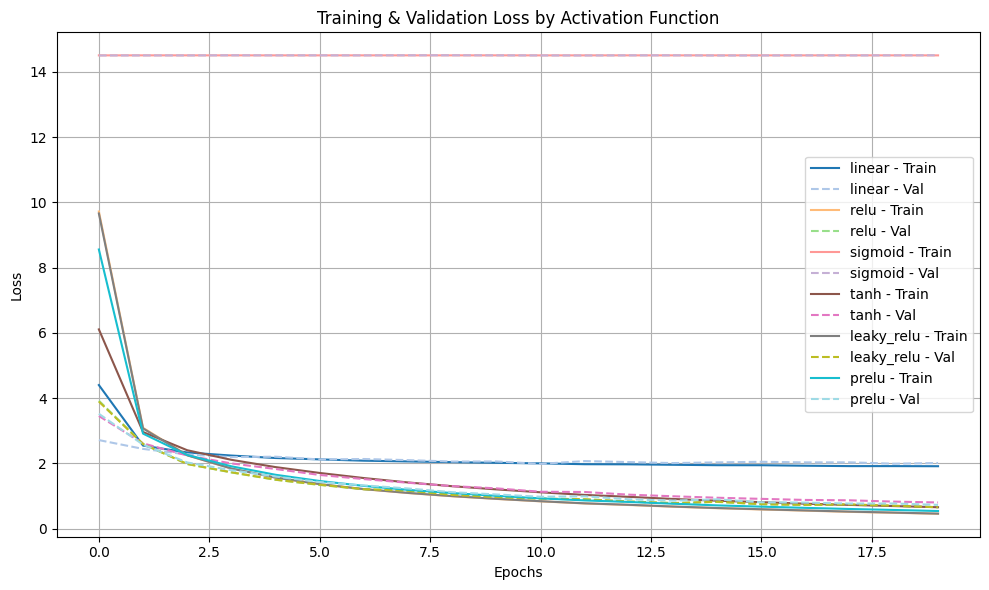

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10, 6))

# Get a color map with enough unique colors
color_map = cm.get_cmap('tab20', len(activation_losses) * 2)  # times 2 for train and val

for idx, (name, (train_loss, val_loss)) in enumerate(activation_losses.items()):
    color_train = color_map(idx * 2)
    color_val = color_map(idx * 2 + 1)
    plt.plot(train_loss, label=f'{name} - Train', color=color_train)
    plt.plot(val_loss, linestyle='--', label=f'{name} - Val', color=color_val)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss by Activation Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



==================== linear Weight Distribution ====================


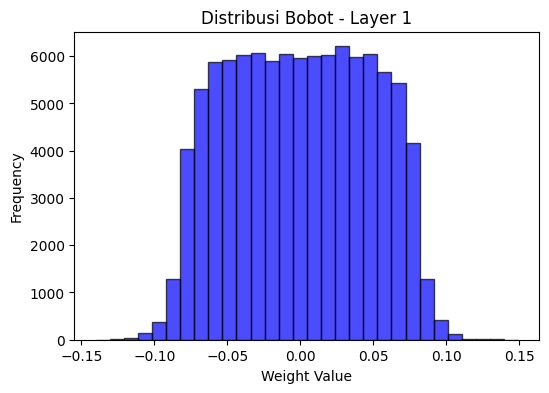

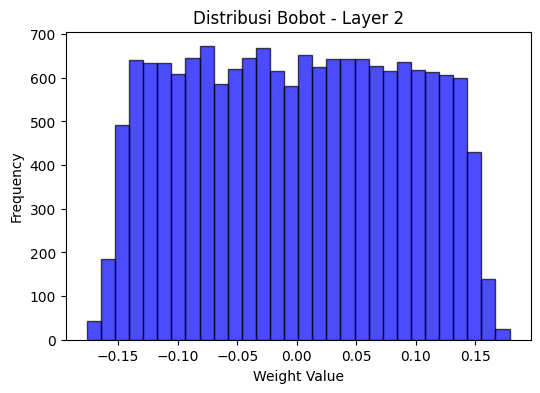

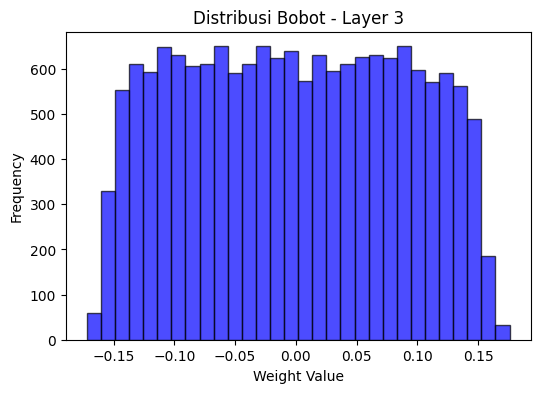


==================== relu Weight Distribution ====================


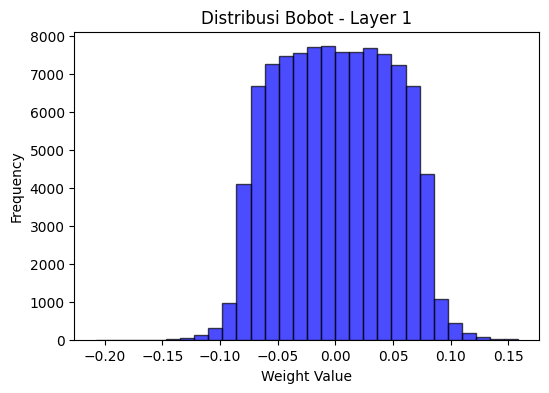

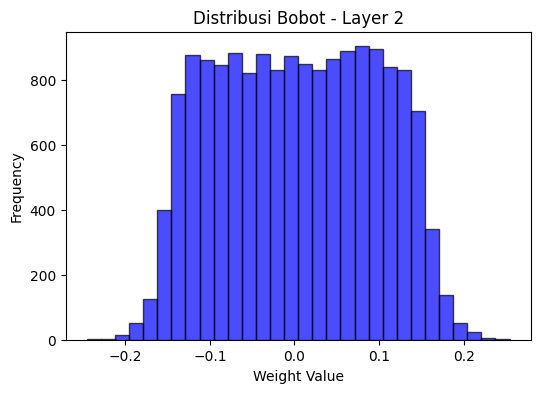

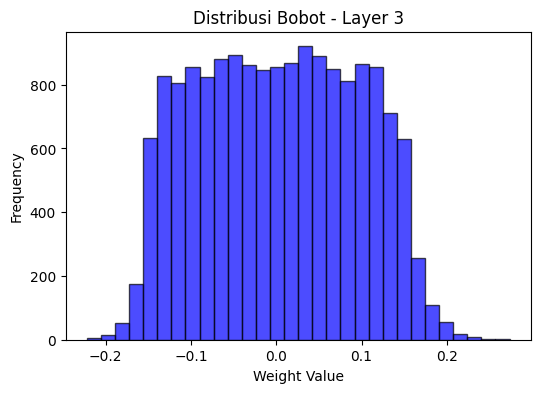


==================== sigmoid Weight Distribution ====================


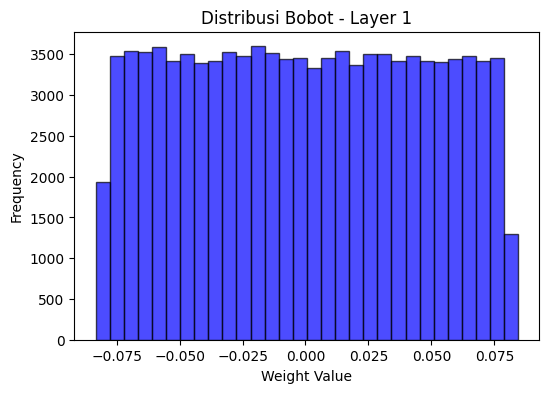

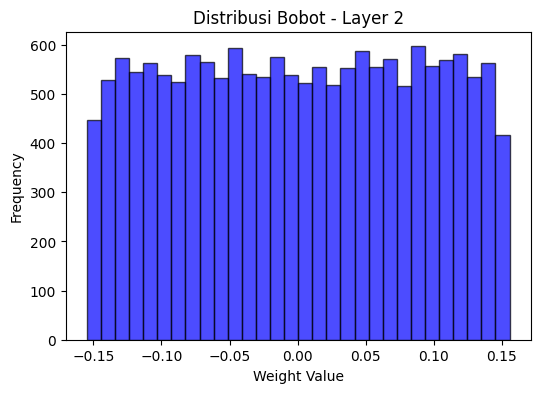

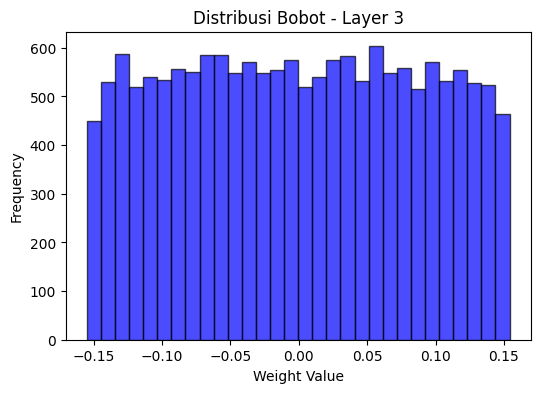


==================== tanh Weight Distribution ====================


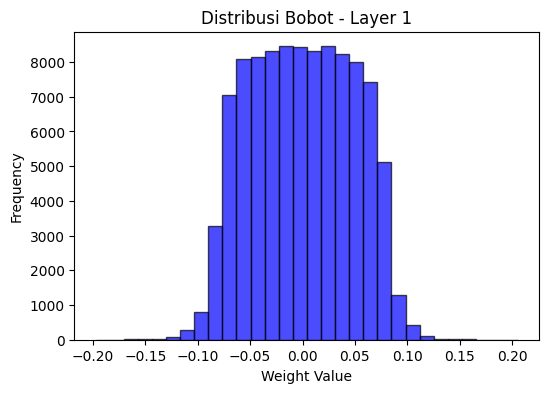

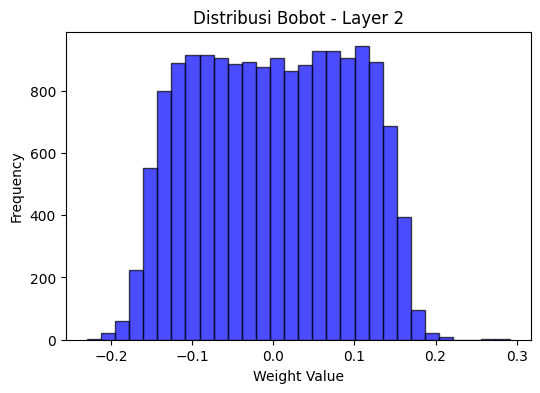

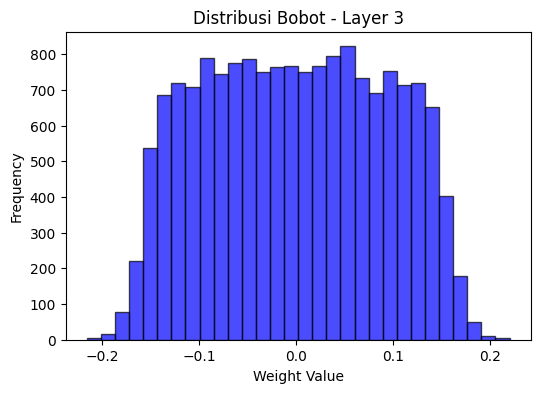


==================== leaky_relu Weight Distribution ====================


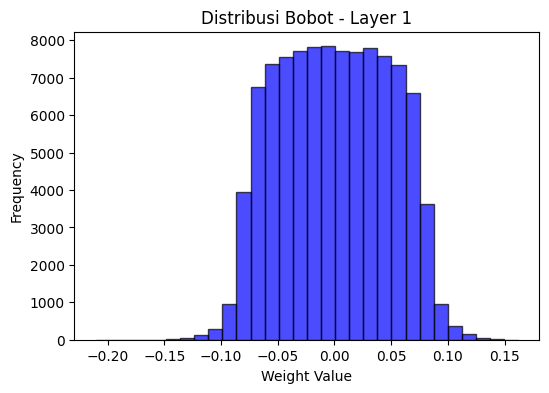

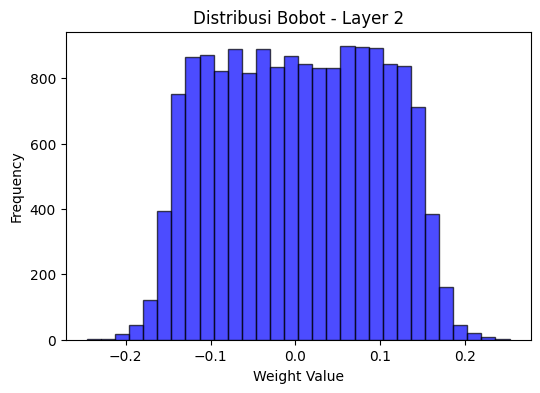

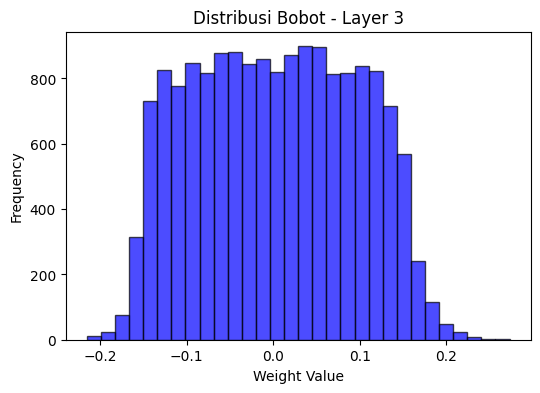


==================== prelu Weight Distribution ====================


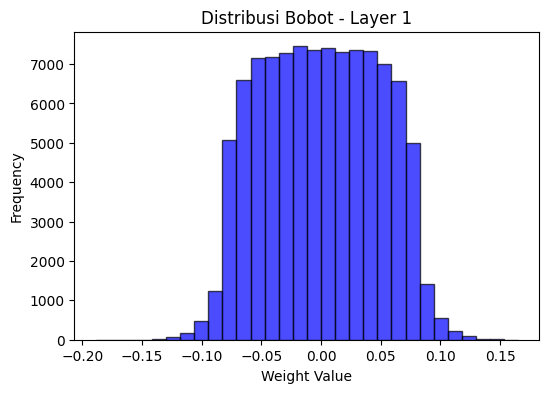

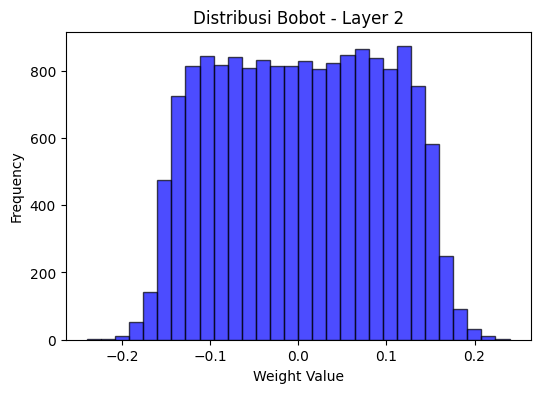

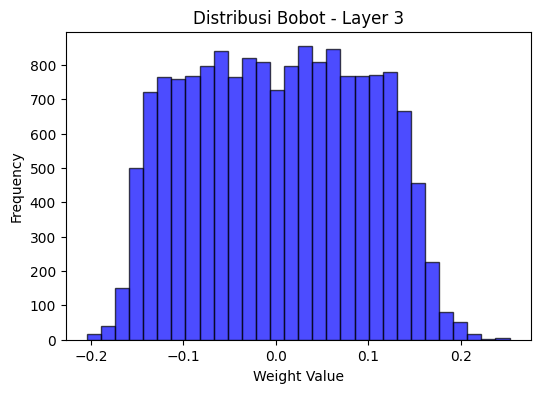

In [49]:
# ann.visualize_weight_distribution((1,2,3))


# Tuple indicating which layers to visualize
layers_to_visualize = (1, 2, 3)  # Adjust based on your actual architecture

for name, model in activation_models.items():
    print(f"\n{'='*20} {name} Weight Distribution {'='*20}")
    model.visualize_weight_distribution(layers_to_visualize)



==================== linear Weight Gradient Distribution ====================


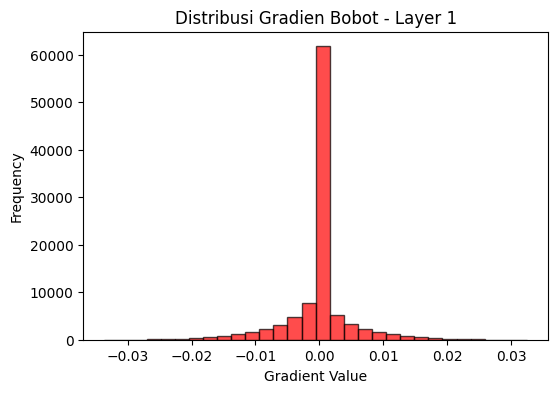

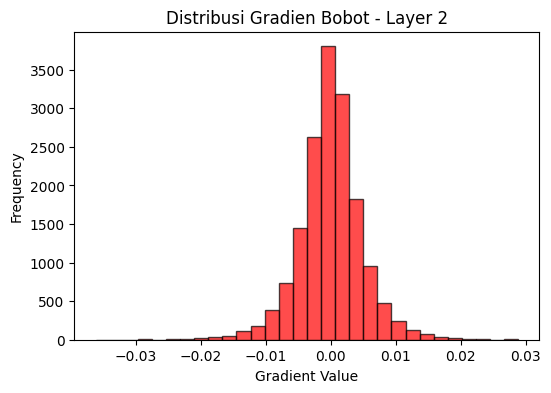

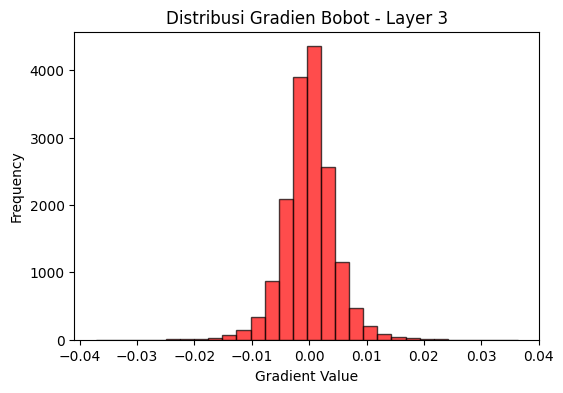


==================== relu Weight Gradient Distribution ====================


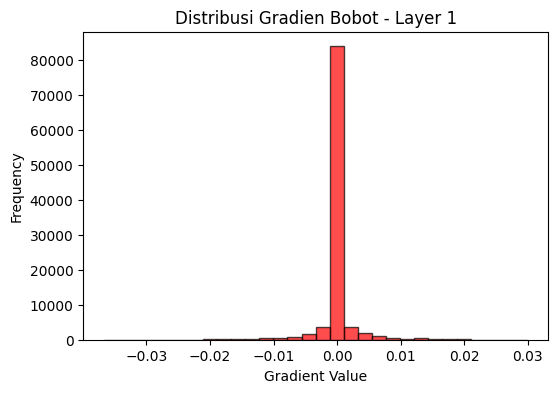

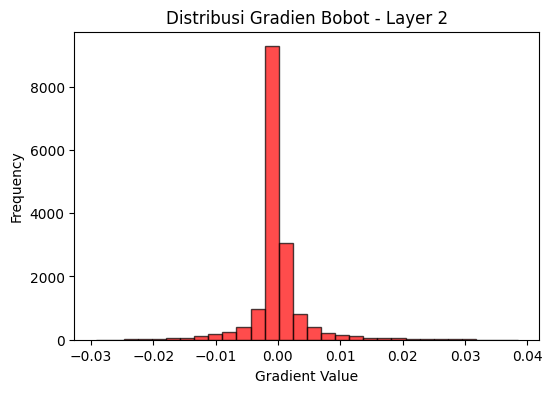

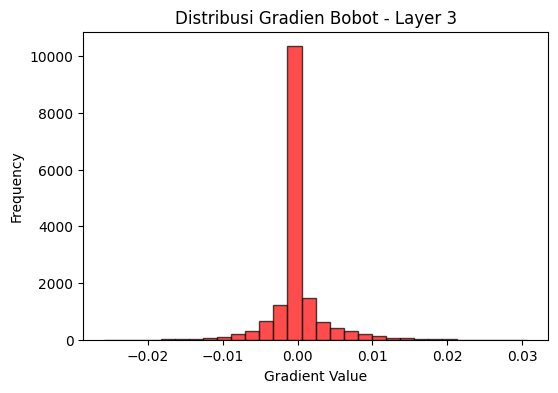


==================== sigmoid Weight Gradient Distribution ====================


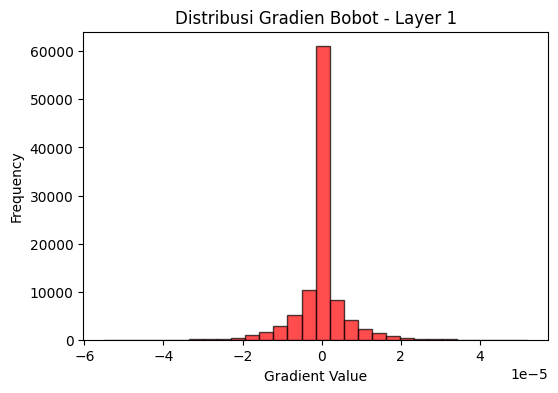

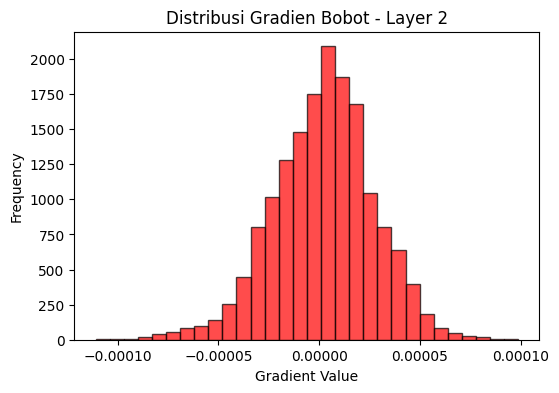

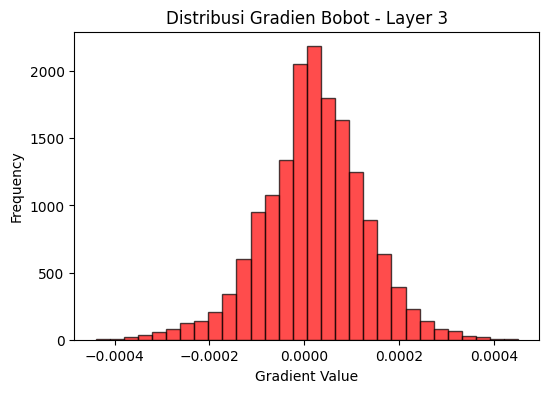


==================== tanh Weight Gradient Distribution ====================


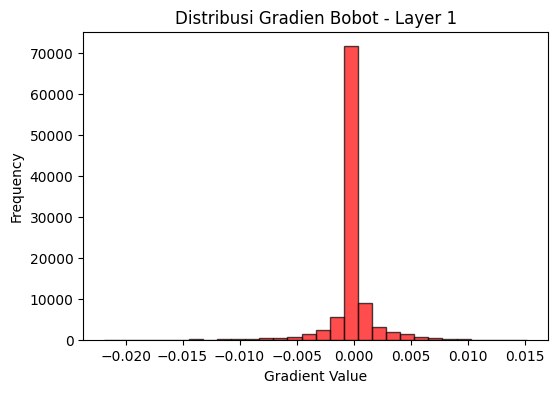

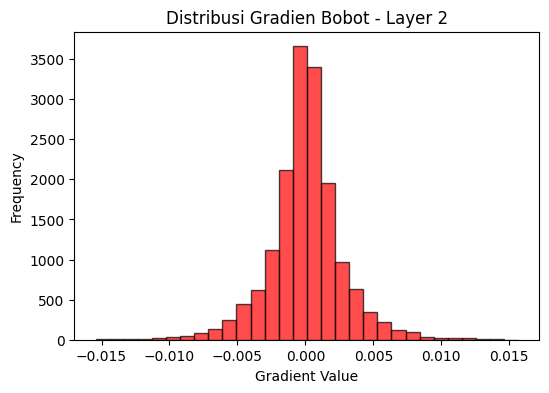

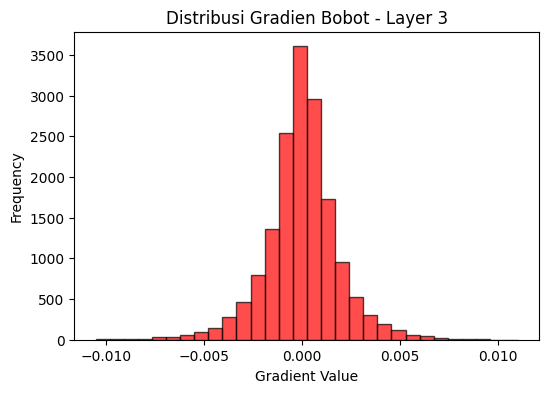


==================== leaky_relu Weight Gradient Distribution ====================


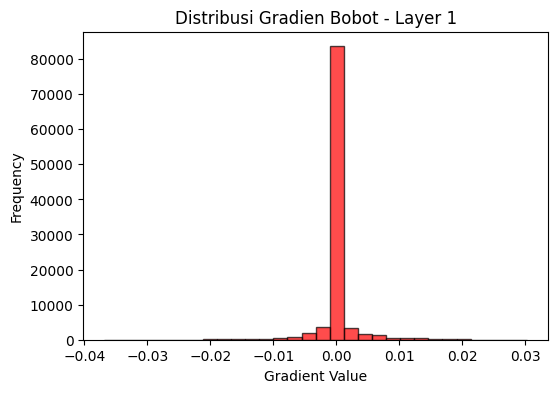

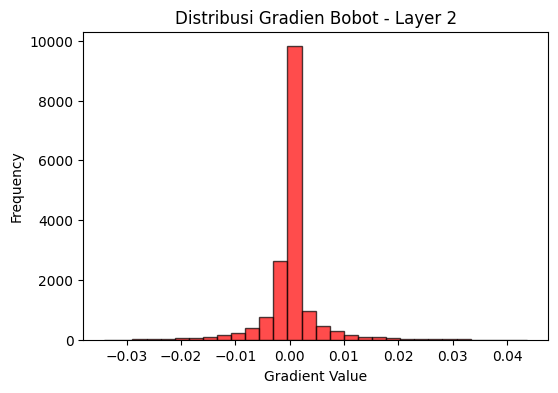

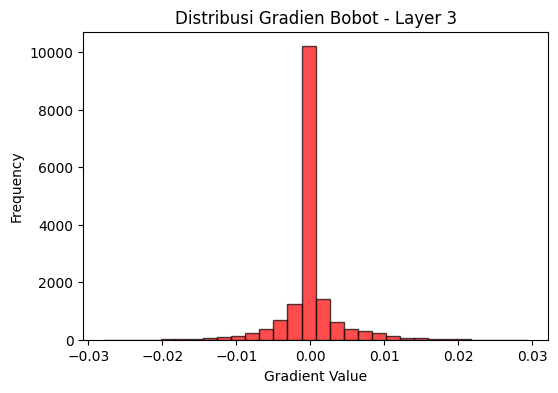


==================== prelu Weight Gradient Distribution ====================


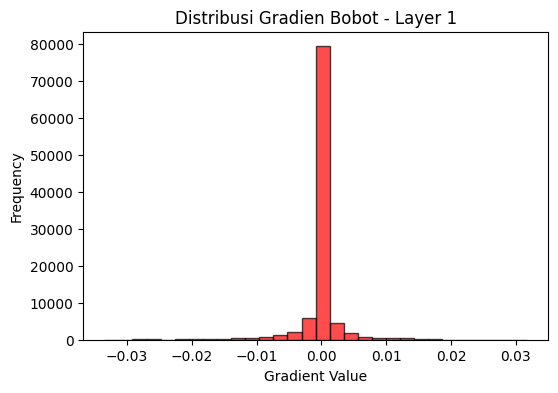

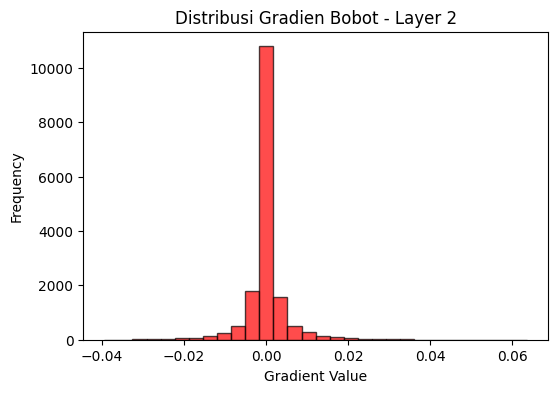

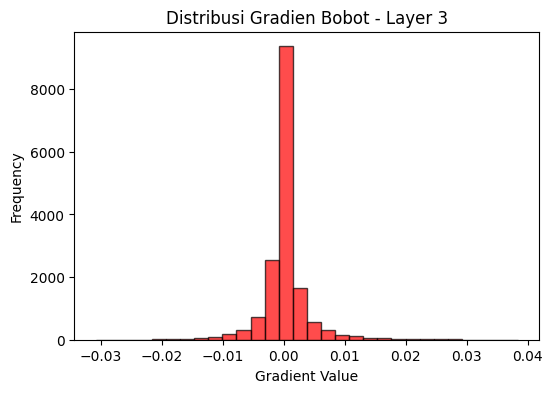

In [50]:
# ann.visualize_weight_distribution((1,2,3))


# Tuple indicating which layers to visualize
layers_to_visualize = (1, 2, 3)  # Adjust based on your actual architecture

for name, model in activation_models.items():
    print(f"\n{'='*20} {name} Weight Gradient Distribution {'='*20}")
    model.visualize_gradient_distribution(layers_to_visualize)
